In [12]:
#import data science packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [13]:
encoded_df = pd.read_csv("GWAS_analysis_OHE.csv")
encoded_df.head()

,Indiv_ID,Gender,rs3769005_CC,rs3769005_CG,rs3769005_GG,imm_1_67459652_AA,imm_1_67459652_AG,imm_1_67459652_GG,imm_7_51057559_AA,imm_7_51057559_AG,...,rs1375131_AA,rs1375131_AG,rs1375131_GG,rs2563397_AG,rs2563397_GG,1kg_1_241045805_AA,1kg_1_241045805_AG,rs34367277_AG,rs34367277_GG,Affectation
0,6198863118_R01C01,0,0,0,1,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
1,8647968039_R01C02,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,1,0,0,1,0
2,6198863118_R02C01,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
3,6198863118_R03C01,1,0,1,0,0,0,1,0,1,...,0,0,1,1,0,0,1,1,0,0
4,8647968039_R02C02,0,0,0,1,1,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0


In [14]:
encoded_df.rename(columns={"Indiv_ID":"patient_ID"}, inplace=True)
encoded_df.set_index("patient_ID", inplace= True)
encoded_df.head()

,Gender,rs3769005_CC,rs3769005_CG,rs3769005_GG,imm_1_67459652_AA,imm_1_67459652_AG,imm_1_67459652_GG,imm_7_51057559_AA,imm_7_51057559_AG,imm_7_51057559_GG,...,rs1375131_AA,rs1375131_AG,rs1375131_GG,rs2563397_AG,rs2563397_GG,1kg_1_241045805_AA,1kg_1_241045805_AG,rs34367277_AG,rs34367277_GG,Affectation
patient_ID,,,,,,,,,,,,,,,,,,,,,
6198863118_R01C01,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,1,1,0,0,1,0
8647968039_R01C02,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,1,1,0,0,1,0
6198863118_R02C01,0,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,1,0
6198863118_R03C01,1,0,1,0,0,0,1,0,1,0,...,0,0,1,1,0,0,1,1,0,0
8647968039_R02C02,0,0,0,1,1,0,0,0,0,1,...,1,0,0,0,1,1,0,0,1,0


<AxesSubplot:ylabel='patient_ID'>

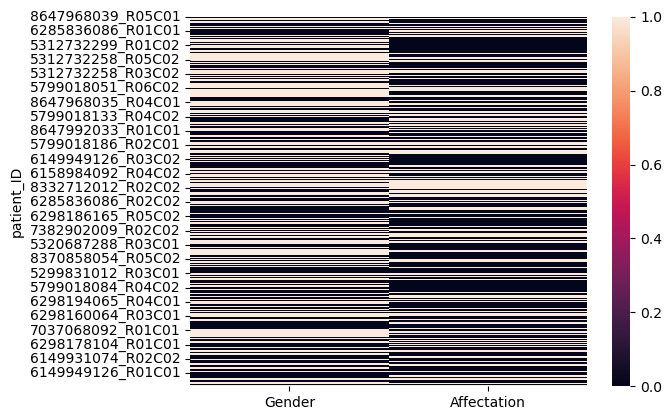

In [15]:
encoded_df = shuffle(encoded_df)
sns.heatmap(encoded_df[["Gender", "Affectation"]])

In [16]:
X_encoded = encoded_df.drop(["Affectation"], axis = 'columns')
y = encoded_df["Affectation"]
print(X_encoded.shape)
print(y.shape)

(2645, 1057)
(2645,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.15, random_state=123, stratify = y)
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (2248, 1057)
X_test : (397, 1057)
y_train : (2248,)
y_test : (397,)


In [18]:
y_train_strat = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
y_test_strat = len(y_test[y_test == 0]) / len(y_test[y_test == 1])
print(f"y_train : {y_train.value_counts()}")
print('Ratio of 0:1 in y_train: %0.2f' % y_train_strat )
print(f"y_test : {y_test.value_counts()}")
print('Ratio of 0:1 in y_test: %0.2f' % y_test_strat) 

y_train : 0    1391
1     857
Name: Affectation, dtype: int64
Ratio of 0:1 in y_train: 1.62
y_test : 0    246
1    151
Name: Affectation, dtype: int64
Ratio of 0:1 in y_test: 1.63


In [19]:

model = KNeighborsClassifier()


model_name = str(model).replace("()", "")




n_neighbors = range(1, 21, 2)


weights = ['uniform', 'distance']


metric = ['euclidean', 'manhattan', 'minkowski']


grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)


grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, verbose=1)


grid_result = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [20]:

print("Best: %0.2f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%0.2f (%0.2f) with: %r" % (mean, stdev, param))

Best: 0.65 using {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.60 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.60 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.62 (0.01) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.62 (0.01) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.63 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.63 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.63 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.63 (0.02) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.64 (0.01) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.64 (0.01) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.64 (0.01) with: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
0.64 (0.01

Find the model that has the highest accuracy

In [21]:
# Best estimator object
print(f"Model = {grid_result.best_estimator_}")
print(f"Model parameters = {grid_result.best_params_}")

#Score on the test set
print("Accuracy score on the test set = %0.2f" % grid_result.score(X_test, y_test))

#Summarizing and storing the grid search in a dataframe
grid_search_results = pd.DataFrame(grid_result.cv_results_)
grid_search_results = grid_search_results.sort_values(by = 'mean_test_score', ascending = False )

#Output the info to a text file
filename = "model outputs/"+model_name+"_grid_search_results.txt"
f = open(filename, 'w')
print(f"Best performing model = {grid_result.best_estimator_} \n", file = f)
print("Accuracy score on the test set = %0.2f \n" % grid_result.score(X_test, y_test) , file = f)
print(f"Model parameters = {grid_result.best_params_} \n", file = f)
print(grid_search_results, file = f)
f.close()

Model = KNeighborsClassifier(metric='euclidean', n_neighbors=19)
Model parameters = {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
Accuracy score on the test set = 0.65


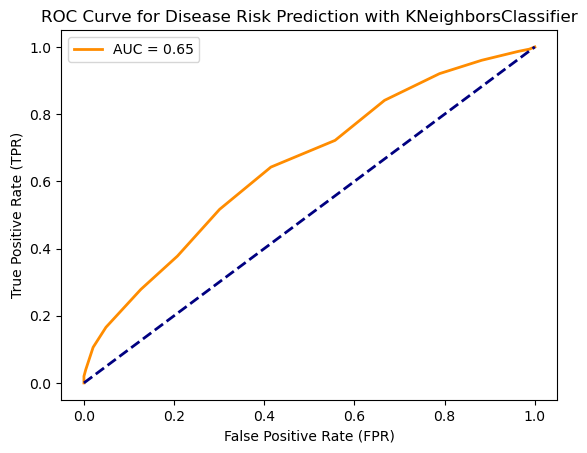

Area under curve (AUC) = 0.65



In [22]:

from sklearn.metrics import roc_curve, roc_auc_score
y_proba = grid_result.predict_proba(X_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

fig = plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'ROC Curve for Disease Risk Prediction with {model_name}')
plt.legend(loc="best")


plt.savefig(f"model outputs/{model_name}_ROC_AUC_curve.pdf")
plt.show()

print('Area under curve (AUC) = %0.2f' % roc_auc)
print()

In [23]:
from sklearn.metrics import confusion_matrix


best_model = grid_result.best_estimator_


best_model_result = best_model.fit(X_train, y_train)

y_pred = best_model_result.predict(X_test)


my_confusion_matrix = confusion_matrix(y_test, y_pred)

my_confusion_matrix 

array([[215,  31],
       [109,  42]], dtype=int64)

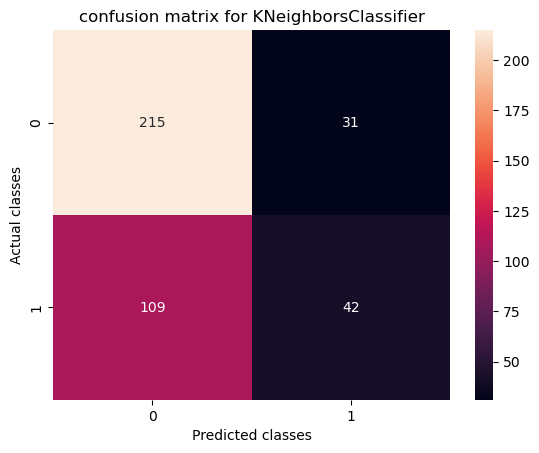

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay as CMD


sns.heatmap(my_confusion_matrix, annot=True, fmt = '.0f')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.title(f'confusion matrix for {model_name}')
plt.savefig(f"model outputs/{model_name}_confusion_matrix.pdf")
plt.show()

In [25]:
from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)
filename = "model outputs/"+str(model_name)+"_classification_report.txt"
f = open(filename, 'w')
print(f"Classification report for {str(model_name)} \n", file=f)
print(report_initial, file = f)
f.close()

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       246
           1       0.58      0.28      0.37       151

    accuracy                           0.65       397
   macro avg       0.62      0.58      0.56       397
weighted avg       0.63      0.65      0.61       397

